<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220608_cat-in-dat_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [111]:
train_temp = pd.read_csv(data_path + 'train.csv')

In [112]:
train.shape, train_temp.shape # index_col='id' 지정으로 shape 변화됨

((300000, 24), (300000, 25))

In [113]:
train.shape, test.shape # 훈련데이터 300,000행, 테스트데이터 200,000행

((300000, 24), (200000, 23))

In [114]:
train.head() # 피처 개수가 많아서 중간 피처들이 생략됨

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [115]:
pd.options.display.max_columns=24 # 열 개수 24개 까지 생략없이 출력됨 

In [116]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [117]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


 - 인덱스 300,000부터 시작
 - 테스트 데이터 인덱스가 300,000부터 시작하기 때문

 - target 열은 기본값이 0.5로 일괄 입력돼 있음
 - 타깃값은 0과 1
 - 이중 타깃값이 1일 확률을 예측해 저장

### 피처 요약표 만들기

In [118]:
def resumetable(df):
    print('데이터 형상 : {}'.format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    # isnull() : 결측값이면 True, 아니면 False의 DataFrame
    # sum() : 컬럼별로 True의 개수를 Series
    # values : Series의 값만 → array 형태로
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


 - 이진 피처 : bin_0~bin_4(0/1, F/T, N/Y) → T,Y는 1로 F,N은 0으로 인코딩
 - 명목형 피처 : num_0~num_9
 - 순서형 피처 : ord_0~ord_5
 - 그 외 피처 : day, month, target

 - 순서형 데이터는 순서에 따라 타깃값에 미치는 영향이 다르기 때문에 순서에 유의하며 인코딩

In [119]:
# 순서를 파악하기 위해 순서형 피처의 고유값을 확인해보자
for i in range(3):
    feature = 'ord_' + str(i)
    print('{} 고유값 : {}'.format(feature, train[feature].unique())) # unique() : 고윳값이 등장한 순으로 출력됨

ord_0 고유값 : [2 1 3]
ord_1 고유값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [120]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print('{} 고유값 : {}'.format(feature, train[feature].unique())) # unique() : 고윳값이 등장한 순으로 출력됨

ord_3 고유값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [121]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


 - day 피처의 고윳값 7개 : 요일을 나타내는 듯

### 데이터 시각화
 - 타깃값 분포를 통해 데이터의 불균형 정도 파악
 - 보통은 양성(타깃값:1)이 음성(타깃값:0)에 비해 개수가 적다
 - 수치형 데이터 분포 파악 : displot()
 - 범주형 데이터 분포 파악 : countplot()

#### 타깃값 분포

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

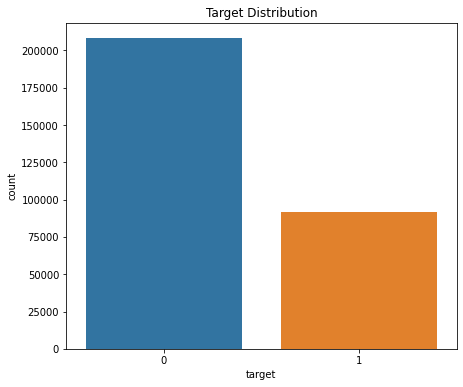

In [123]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

Text(0.5, 1.0, 'Target Distribution')

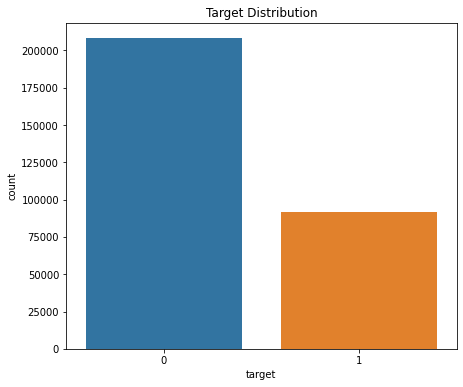

In [124]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [125]:
ax.patches # ax축을 구성하는 그래프 도형 객체 모두를 담은 리스트

 - Rectangle 객체 두개를 포함하는 리스트
 - 이 객체를 활용해 사각형 도형에 대한 정보 획득

In [126]:
rectangle = ax.patches[0]
print('사각형 높이:', rectangle.get_height()) # countplot()에서 막대의 높이 = 데이터 개수
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [127]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)
# len(train) * 0.001 : 여백을 설정하려는데 막대의높이(데이터개수)의 비율을 고려해서 여백설정

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


Text(0.5, 1.0, 'Target Distribution')

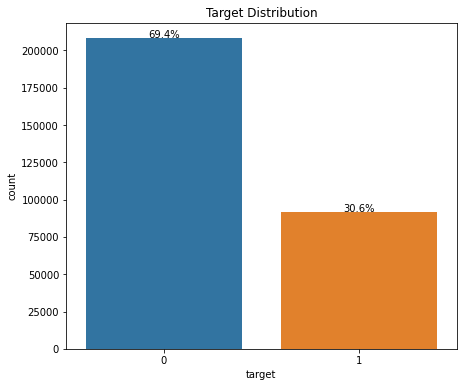

In [128]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(x=left_coord + width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%', # 입력 텍스트
                ha='center') # 가운데 정렬

plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

 - 7:3 분포

#### 이진 피처 분포
 - 고윳값이 Y/N인 bin_4 피처에서 Y인 데이터 중 타깃값 0/1을 구분하여 분포 확인
 - 특정 고윳값이 특정 타깃값에 치우치는지 확인

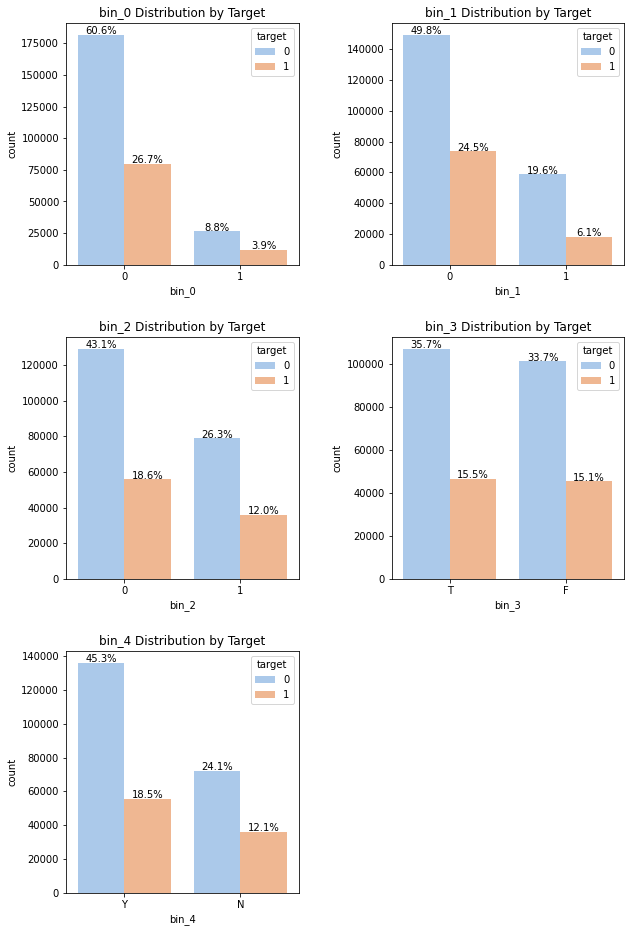

In [129]:
import matplotlib.gridspec as gridspec # 여러 그래프 격자 형태 배치

grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])     # subplot()의 매개변수로 GridSpec클래스 인스턴스인 grid 활용

    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel',
                  ax=ax)
    
    ax.set_title('{} Distribution by Target'.format(feature))
    write_percent(ax, len(train))       # 퍼센트 입력 : 위에서 만들어 놓은 함수

 - 고윳값별로 나눠봐도 타깃값 0,1 분포가 대체로 7:3 수준
 - 이진 피처들은 특정 타깃값에 치우치지 않았음

#### 명목형 피처 분포
 - num_5~nom_9 피처는 고윳값 개수가 많고 의미를 알 수 없는 문자열 → 시각화 불가

In [130]:
# 스텝 1 : 교차분석표 생성 함수 만들기
pd.crosstab(train['nom_0'], train['target']) # crosstab() : 고윳값별 타깃값의 개수

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [131]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100 # normalize='index' : 인덱스(행) 기준으로 정규화
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


 - 현재 인덱스가 피처 이름(nom_0)
 - nom_0인덱스를 열로 가져와야 그래프 그리기 편하다

In [132]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


 - 교차분석표는 앞으로 계속 사용 → 함수

In [133]:
def get_crosstab(df, feature): # 데이터프레임, 피처이름 전달
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [134]:
get_crosstab(train, 'nom_0') # 함수에서 return 되는 crosstab 그대로 활용

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [135]:
crosstab = get_crosstab(train, 'nom_0') # 함수에서 return 되는 crosstab을 변수에 담아서 활용
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [136]:
crosstab[1] # 교차분석표에서 피처 1(타깃값1) 가져오기

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [137]:
# 스텝 2 : 포인트 플롯 생성 함수 만들기
## 이미 카운트플롯이 그려진 축에 포인트플롯을 중복으로 그려줌
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, # x,y 파라미터는 단순한 명칭이 아님
                        order=crosstab[feature].values,
                        color='black',
                        legend=False) # sns.pointplot()을 변수에 담아도 되고, ax=ax2 형식으로 파라미터로 전달해도 됨
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

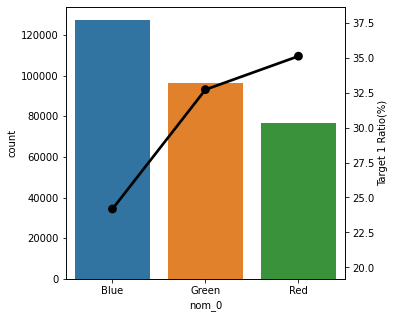

In [138]:
# nom_0 피처로 카운터플롯+포인트플롯 테스트
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax = sns.countplot(x='nom_0', data=train)
# sns.countplot(x='nom_0', data=train, ax=ax2)
plot_pointplot(ax, 'nom_0', crosstab)

In [139]:
# 스텝 3 : 피처 분포도 및 피처별 타깃값 1의 비율 포인트 플롯 생성 함수 만들기
## get_crosstab(), plot_pointplot() 함수를 활용

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    # GridSpec() : 
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 위에서 만들어 놓은 교차분석표 생성 함수

        # 1. ax 축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax) # 파라미터로 전달해도 되고, ax = sns.countplot() 변수로 담아도됨
        
        write_percent(ax, len(df)) # 위에서 만들어 놓은 비율표시 함수

        # 2. ax2(x축만공유) 축에 피처별 타깃값(1) 비율 포인트플롯 그리기
        plot_pointplot(ax, feature, crosstab) # 위에서 만들어 놓은 포인트 플롯 그리기함수

        ax.set_title('{} Distribution'.format(feature))

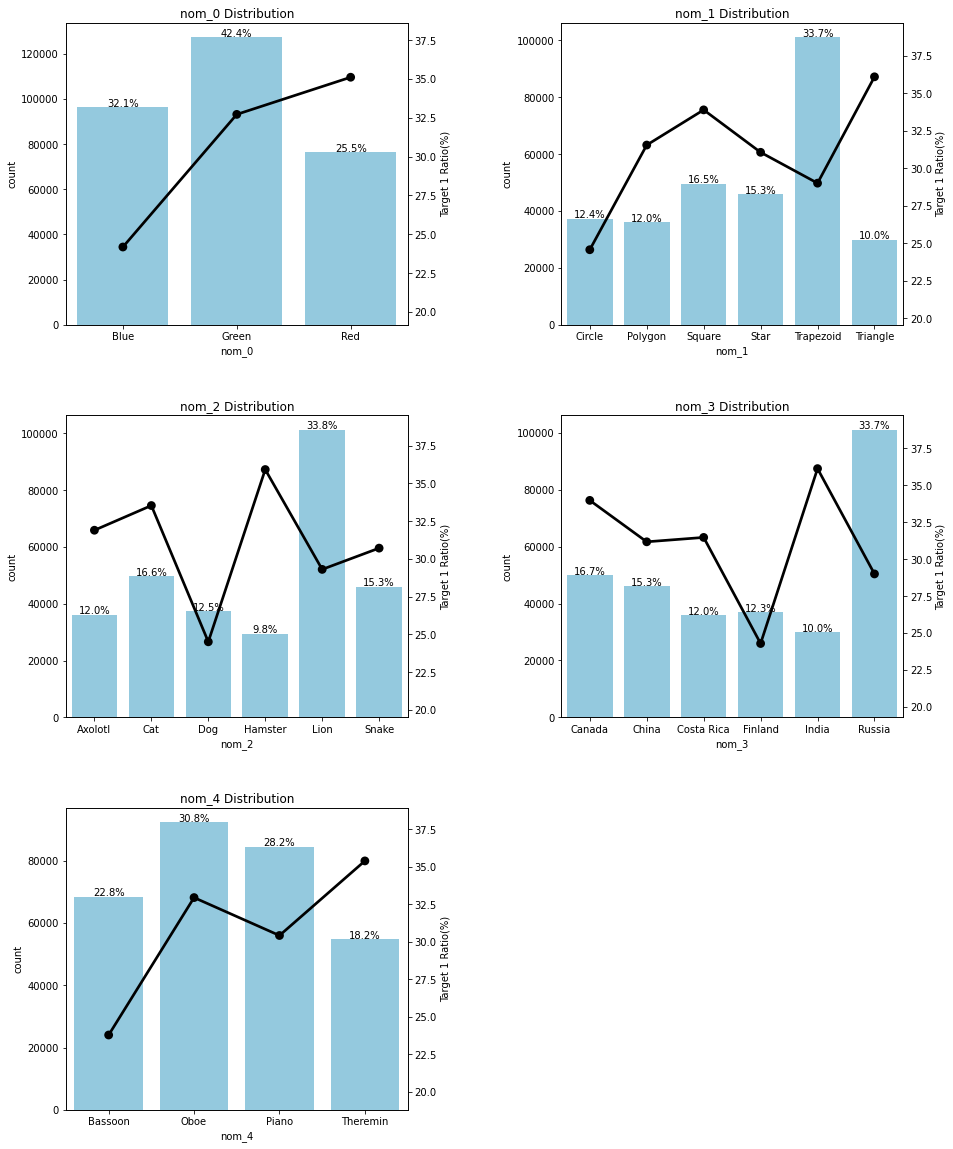

In [140]:
nom_features = ['nom_0','nom_1','nom_2','nom_3','nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

 - 각 고윳값 별로 타깃값:1 비율이 서로 다름
 - 이는 '타깃값에 대한 예측 능력이 있음'을 뜻함

#### 순서형 피처 분포
 - 총 6개
 - ord_0~ord_3 까지는 고윳값 개수 15개 이하
 - ord_4, ord_5 고윳값 개수 많음
 - 그래프 따로 그림

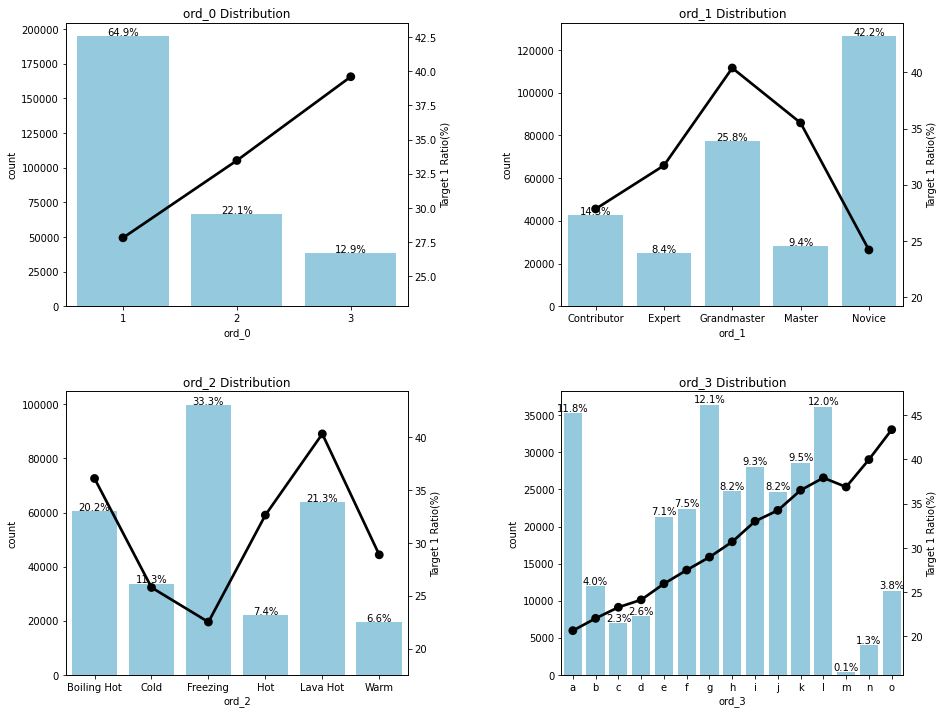

In [141]:
ord_features = ['ord_0','ord_1','ord_2','ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features,
                              num_rows=2, num_cols=2, size=(15,12))

 - ord_1, ord_2 피처 값들의 순서가 정렬되지 않음
 - ord_1 : 'Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'
 - ord_2 : 'Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot'
 - CategoricalDtype() : 범주형 데이터 타입을 만드는 함수, 파라미터로 피처에 순서 지정
   - countplot()함수의 order 파라미터에 순서를 전달하면 순서대로 그려지나, 근본적으로 피처 자체에 순서가 수정된것이 아님

In [142]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'] # list
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True) # CategoricalDtype
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 피처(컬럼) 데이터 타입 변경
## dtype: object → dtype: category, Categories (5, object): ['Novice' < 'Contributor' < 'Expert' < 'Master' < 'Grandmaster']
## 피처의 데이터 순서가 바뀌는 것이 아니라, 피처를 정렬/그래프 활용시의 순서를 지정하는 것
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

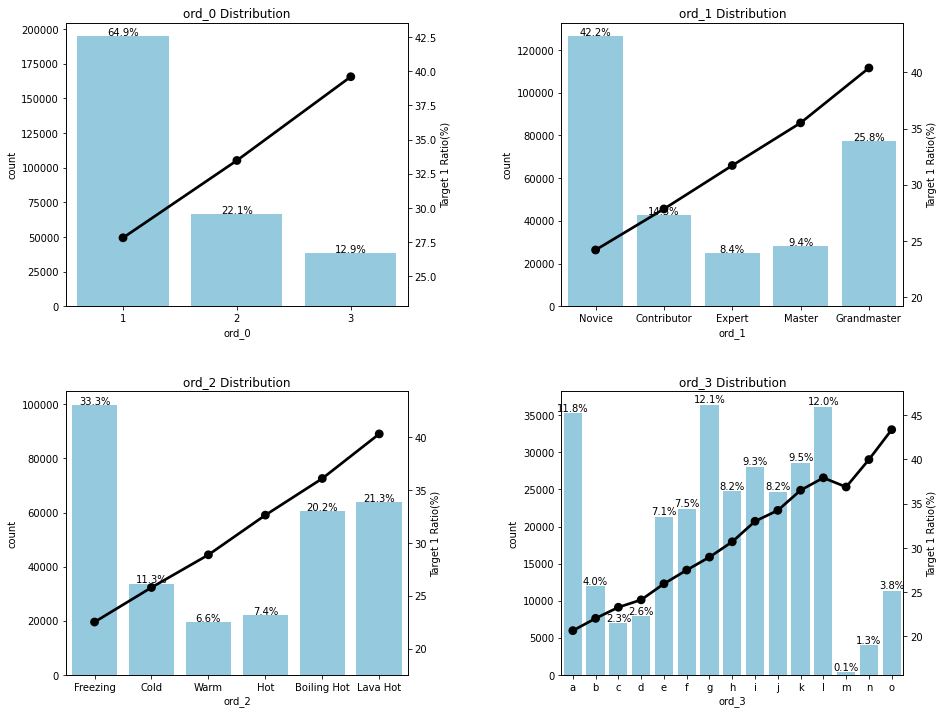

In [146]:
ord_features = ['ord_0','ord_1','ord_2','ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features,
                              num_rows=2, num_cols=2, size=(15,12))

 - 고윳값 순서에 따라 타깃값:1 비율도 비례해서 커짐

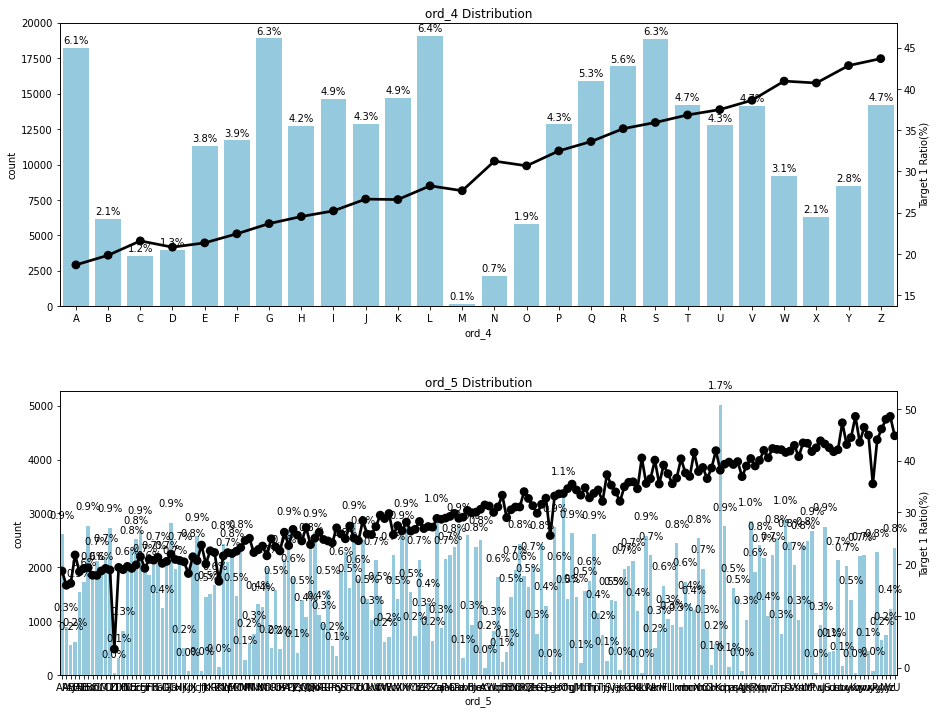

In [151]:
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'],
                              num_rows=2, num_cols=1, size=(15,12))

 - 고윳값 순서에 따라 타깃값:1 비율도 비례해서 커지는 양상

 - 모든 그래프에서 순서와 비율 사이에 상관관계가 있음 → 순서형 피처 중에서도 필요 없는 피처 없음

#### 날짜 피처 분포

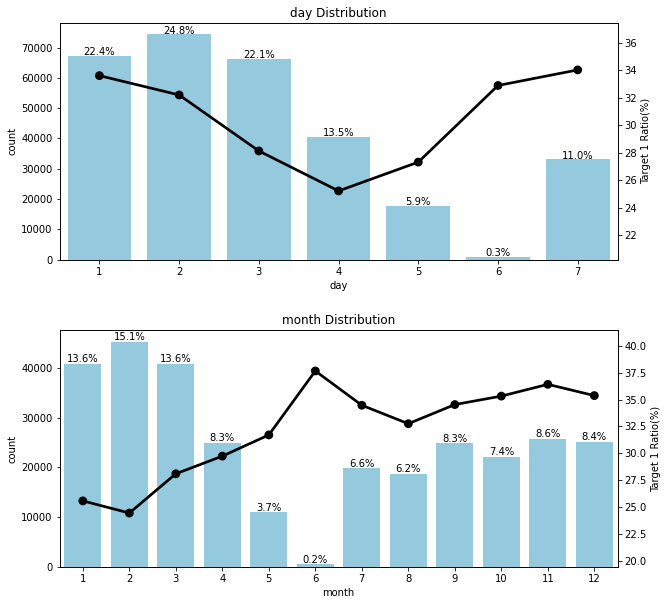

In [152]:
date_features = ['day','month']
plot_cat_dist_with_true_ratio(train, date_features,
                              num_rows=2, num_cols=1, size=(10,10))

 - day 피처가 7개 인것으로 보아 요일을 의미
 - 머신러닝 모델은 22년 12월의 '12'와 23년 1월의 '1'의 차이를 11로 본다
 - 삼각함수(sin, cos) 사용해 인코딩 해야함
 -  이렇듯 매년,매월,매주,매일 반복되는 데이터를 **순환형 데이터**라고 함
 - 날짜 피처는 값의 크고 작음으로 해석되지 못하도록 원-핫 인코딩 해야함